In [18]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [ ]:
#Get Timings of Messages
#Get Timings of Merges from Forks
#Try to find some correlation with successful projects
data=pd.read_csv("../bigfiles/messages_2019_8.csv", usecols=["list","datetime","subject","body"], header=0)
data['datetime'] = pd.to_datetime(data['datetime'])
project_data_sorted = data.sort_values(by='datetime')
unique_projects=np.unique(list(data['list']))
start_date = pd.to_datetime('2003-04-15 14:48:40-07')
end_date = pd.to_datetime('2019-08-31 16:25:30-07:00')

filtered_data = data[(data['datetime'] >= start_date) & (data['datetime'] <= end_date)]

In [119]:
data=pd.read_csv("../bigfiles/messages_2019_8.csv", usecols=["list","datetime","subject","body"], header=0)

In [121]:
data['datetime'] = pd.to_datetime(data['datetime'])

/var/folders/db/lqw0qtln00x0zzx380__sczm0000gn/T/ipykernel_9860/2412623082.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['datetime'] = pd.to_datetime(data['datetime'])


In [122]:
project_data_sorted = data.sort_values(by='datetime')

In [123]:
unique_projects=np.unique(list(data['list']))

In [124]:
project_dict={}
i=0
for unique_project in unique_projects:
    project_dict[i]=unique_project
    i+=1

In [125]:
start_date = pd.to_datetime('2003-04-15 14:48:40-07')
end_date = pd.to_datetime('2019-08-31 16:25:30-07:00')

filtered_data = data[(data['datetime'] >= start_date) & (data['datetime'] <= end_date)]

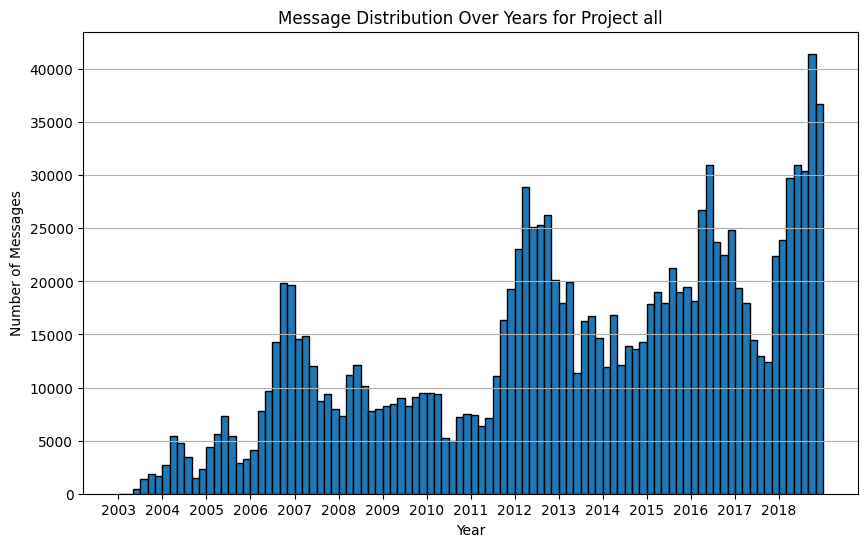

In [172]:
project_years = filtered_data['datetime'].apply(lambda x: int(x.year) + int(x.month)/12)
plt.figure(figsize=(10, 6))
plt.hist(project_years, bins=np.arange(2003, 2019,step=.166666), edgecolor='black')  # bins from 2003 to 2022
plt.title(f'Message Distribution Over Years for Project {"all"}')
plt.xlabel('Year')
plt.ylabel('Number of Messages')
plt.xticks(np.arange(2003, 2019))  # Set x-ticks to be every year for clarity
plt.grid(axis='y')
plt.show()

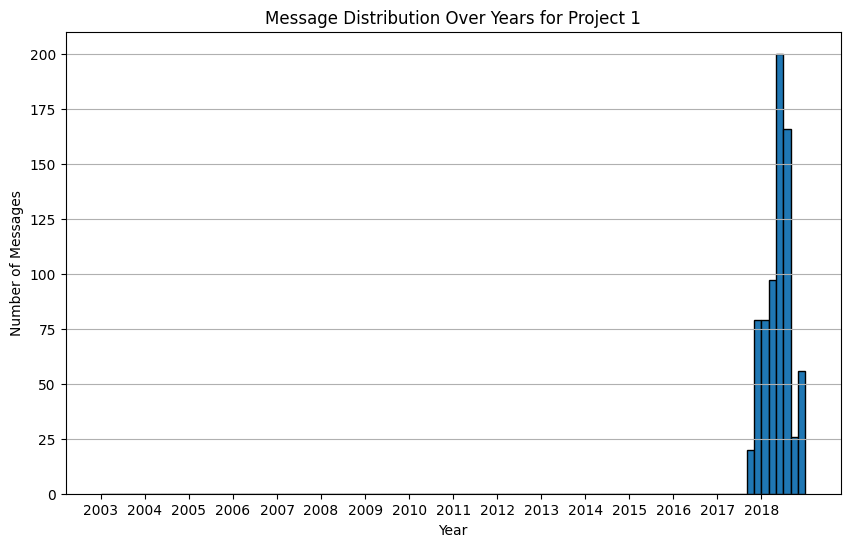

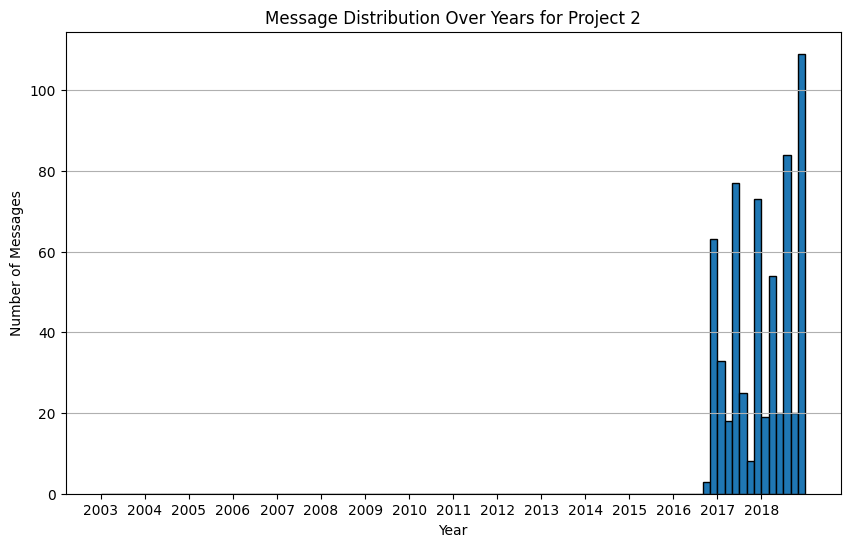

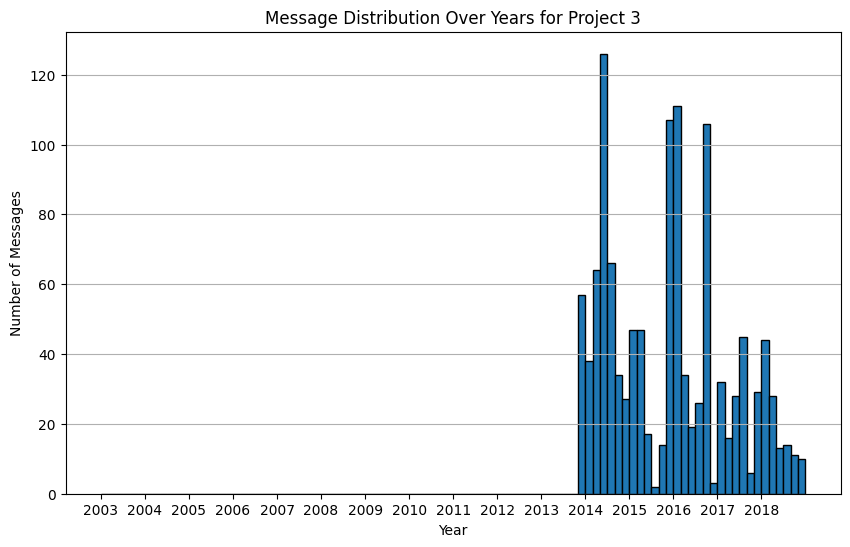

In [62]:
i=0
for project_id in unique_projects:
    project_data = filtered_data[filtered_data['list'] == project_id]
    
    # Extract the year from each datetime for the current project
    # print(type(project_data['datetime']))
    project_years = project_data['datetime'].apply(lambda x: int(x.year) + int(x.month)/12)
    plt.figure(figsize=(10, 6))
    plt.hist(project_years, bins=np.arange(2003, 2019,step=.166666), edgecolor='black')  # bins from 2003 to 2022
    plt.title(f'Message Distribution Over Years for Project {project_id}')
    plt.xlabel('Year')
    plt.ylabel('Number of Messages')
    plt.xticks(np.arange(2003, 2019))  # Set x-ticks to be every year for clarity
    plt.grid(axis='y')
    plt.show()
    i+=1
    if i>2:
        break

In [262]:
commit_data=pd.read_csv("../bigfiles/commits_2019_8.csv", usecols=["list","commit_datetime", 'committerid', 'messageid'], header=0)

In [263]:
commit_data['commit_datetime'] = pd.to_datetime(commit_data['commit_datetime'])

/var/folders/db/lqw0qtln00x0zzx380__sczm0000gn/T/ipykernel_9860/3660982828.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  commit_data['commit_datetime'] = pd.to_datetime(commit_data['commit_datetime'])


In [264]:
commit_filtered_data = commit_data[(commit_data['commit_datetime'] >= start_date) & (commit_data['commit_datetime'] <= end_date)]

In [260]:
unique_projects

array([  1,   2,   3,   5,   6,   7,   8,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 153, 154, 155, 156, 157, 159,
       160, 161, 163, 164, 167, 168, 169, 170, 171, 172, 173, 175, 176,
       177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 194, 195, 196, 197, 199, 200, 201, 202, 203, 20

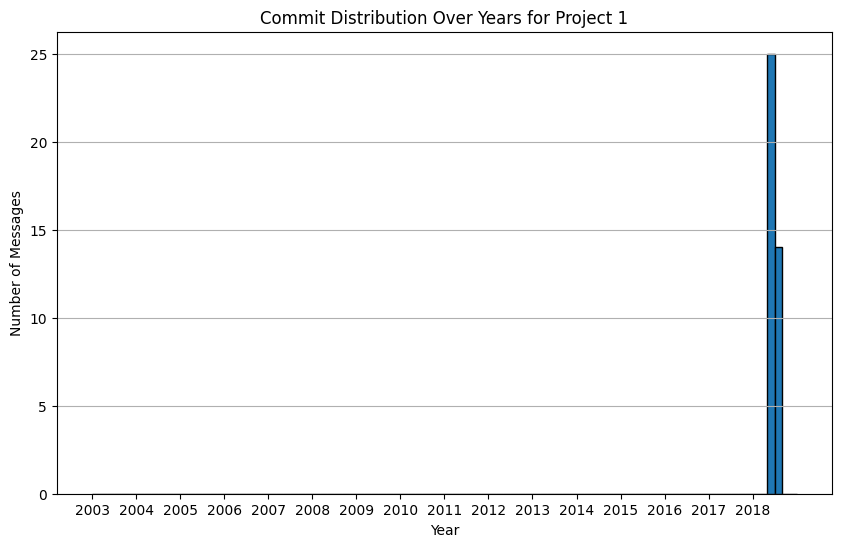

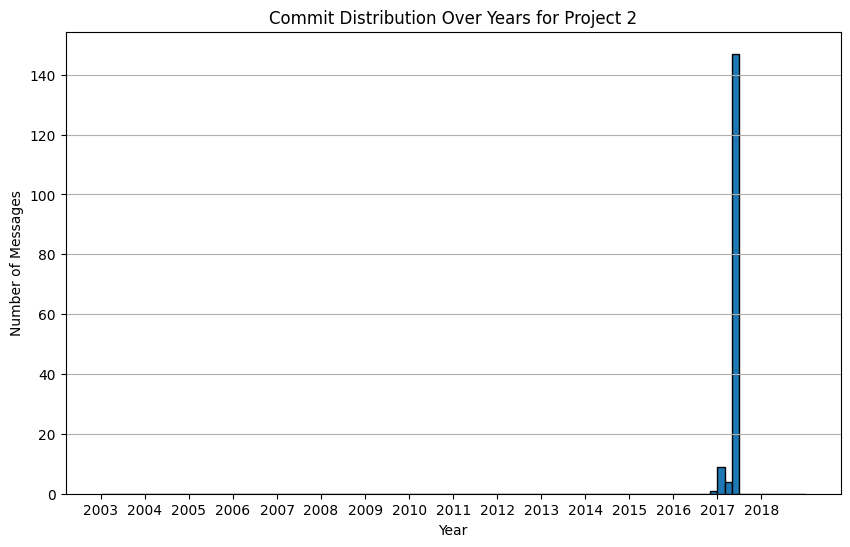

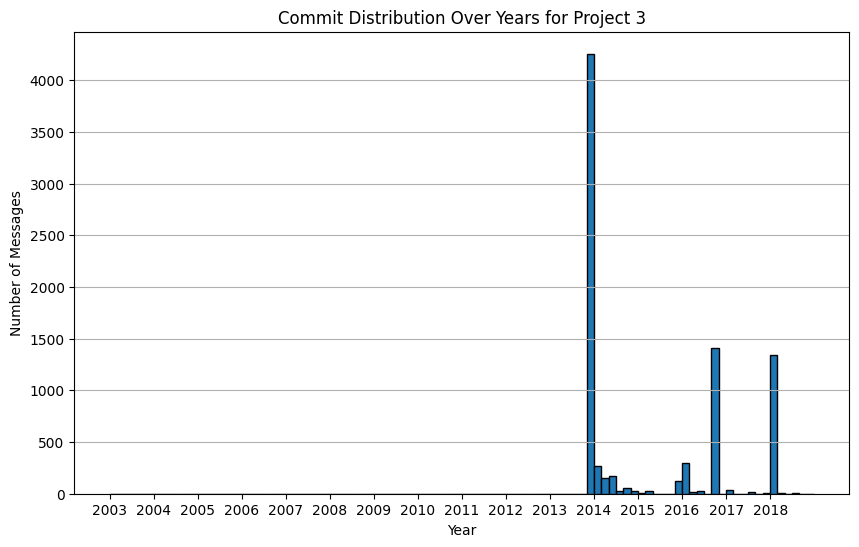

In [71]:
i=0
for project_id in unique_projects:
    project_data = commit_filtered_data[commit_filtered_data['list'] == project_id]
    
    # Extract the year from each datetime for the current project
    # print(type(project_data['datetime']))
    project_years = project_data['commit_datetime'].apply(lambda x: int(x.year) + int(x.month)/12)
    plt.figure(figsize=(10, 6))
    plt.hist(project_years, bins=np.arange(2003, 2019,step=.166666), edgecolor='black')  # bins from 2003 to 2022
    plt.title(f'Commit Distribution Over Years for Project {project_id}')
    plt.xlabel('Year')
    plt.ylabel('Number of Messages')
    plt.xticks(np.arange(2003, 2019))  # Set x-ticks to be every year for clarity
    plt.grid(axis='y')
    plt.show()
    i+=1
    if i>2:
        break

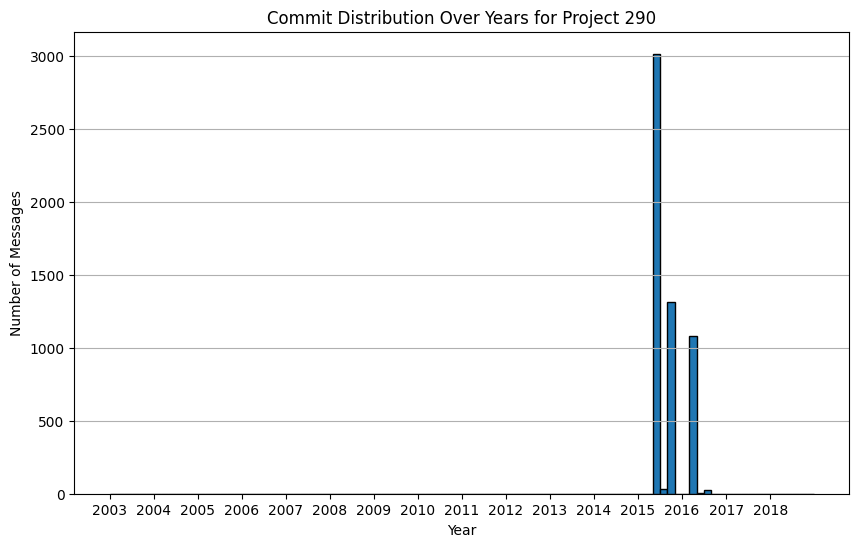

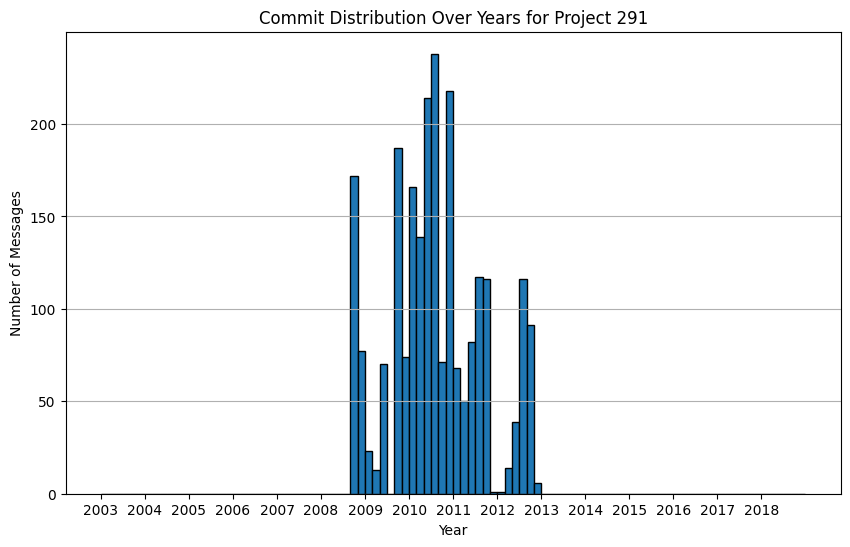

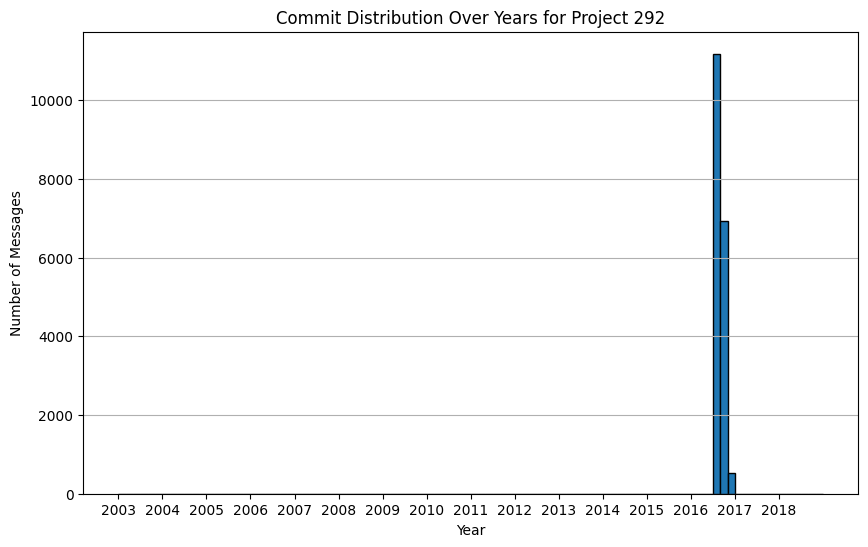

In [80]:
i=0
for project_id in unique_projects[250:]:
    project_data = commit_filtered_data[commit_filtered_data['list'] == project_id]
    
    # Extract the year from each datetime for the current project
    # print(type(project_data['datetime']))
    project_years = project_data['commit_datetime'].apply(lambda x: int(x.year) + int(x.month)/12)
    plt.figure(figsize=(10, 6))
    plt.hist(project_years, bins=np.arange(2003, 2019,step=.166666), edgecolor='black')  # bins from 2003 to 2022
    plt.title(f'Commit Distribution Over Years for Project {project_id}')
    plt.xlabel('Year')
    plt.ylabel('Number of Messages')
    plt.xticks(np.arange(2003, 2019))  # Set x-ticks to be every year for clarity
    plt.grid(axis='y')
    plt.show()
    i+=1
    if i>2:
        break

In [ ]:
commit_data['commit_datetime'].diff()

In [ ]:
commit_data['commit_datetime'] = pd.to_datetime(commit_data['commit_datetime'])
commit_data.sort_values(by='commit_datetime', inplace=True)

# Calculate time differences between consecutive commits
commit_data['time_diff'] = commit_data['commit_datetime'].diff()

# Convert time differences to a suitable format (e.g., hours)
commit_data['time_diff_hours'] = commit_data['time_diff'].dt.total_seconds() / 3600

# Calculate the average time interval
average_interval = commit_data['time_diff_hours'].mean()

# Identify peaks in activity (where time_diff_hours is significantly lower than average_interval)
# This example uses a simple threshold method, but you can adjust the methodology as needed
threshold = average_interval * 0.5  # Example threshold: 50% of the average interval
peak_indices = commit_data[commit_data['time_diff_hours'] < threshold].index

# If you want to use a peak detection algorithm instead of a simple threshold
peaks, _ = find_peaks(-commit_data['time_diff_hours'], height=-threshold)

# Analyzing peaks
# You can now analyze these peaks to understand periods of high activity
print("Peaks in activity found at indices:", peaks)

In [95]:
#Disregard, this is to truncate for GPT
# pd.read_csv("../bigfiles/commits_2019_8.csv", header=0,nrows=150).to_csv("commits.csv")
# pd.read_csv("../bigfiles/messages_2019_8.csv", header=0, nrows=150).to_csv("messages.csv")

In [ ]:
#adding data/making new dataset

### Messages

### Filters
fork merge: (body) "This is a PR merged from a forked repository."
vote: "[VOTE]"


[    0     0   426  1386  1885  1698  2749  5432  4767  3461  1483  2342
  4432  5651  7337  5450  2880  3289  4141  7813  9696 14338 19820 19670
 14567 14897 12022  8696  9352  7943  7315 11187 12124 10186  7837  7937
  8291  8457  9002  8242  9063  9415  9353  9314  5213  4981  7190  7533
  7376  6416  7130 11123 16364 19273 23037 28882 25117 25354 26282 20134
 17946 19900 11348 16258 16752 14653 11955 16789 12122 13947 13643 14266
 17860 19009 18000 21252 19016 19433 18120 26765 30936 23743 22445 24850
 19423 17954 14471 12974 12396 22366 23890 29725 30935 30441 41448 36738]


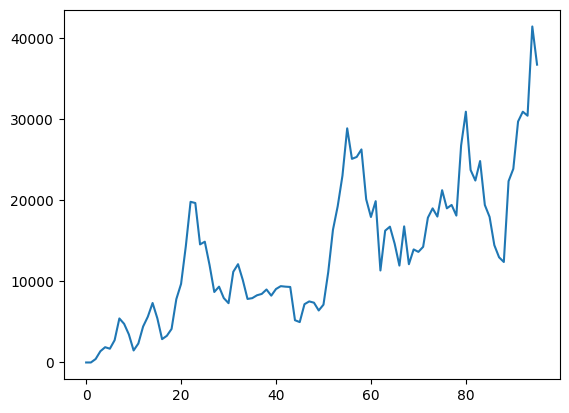

In [189]:

filter=filtered_data['body'].str.contains("").fillna(False)
specific_data = filtered_data[filter]
specific = filtered_data[filtered_data['list'] == project_id]
project_years = specific_data['datetime'].apply(lambda x: int(x.year) + int(x.month)/12)
hist=np.histogram(list(project_years),bins=np.arange(2003, 2019,step=.166666))
print(hist[0])
# for i in range(0,250):
plt.plot(range(len(hist[0])),hist[0])
# plt.ylim((0,10))
plt.show()
# dataset.append(hist[0])

In [274]:
# filter=filtered_data['body'].str.contains("").fillna(False)
# specific_data = filtered_data[filter]
dataset=[]
column='body'
string='Update'
for project_id in unique_projects:
    project_data = filtered_data[filtered_data['list'] == project_id]
    filter=project_data[column].str.contains(string).fillna(False)
    specific_data = project_data[filter]
    # specific_data = specific_data[specific_data['list'] == project_id]
    project_years = specific_data['datetime'].apply(lambda x: int(x.year) + int(x.month)/12)
    hist=np.histogram(list(project_years),bins=np.arange(2003, 2019,step=.166666))
    # print(hist)
    dataset.append(hist[0])

IndexError: list index out of range

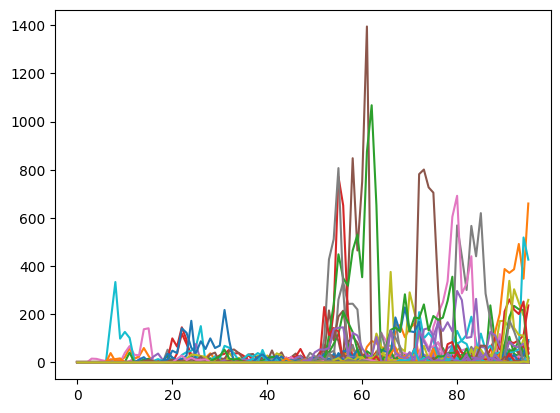

In [275]:
for i in range(0,300):
    plt.plot(range(len(dataset[i])),dataset[i])
plt.show()

Commits

[     0      0      0      0      0      0   2658   3549   2558   5225
  11859  17393  15032   9115  12351   9865   4188   7365  14716  25762
  30293  48042  50228  50092  30791  35069  33836  19554  24591  17369
  16048  18904  19308  11619  12843   9297  14454  17945  13574  17380
  15608  17790  13788  14411   9202  14764  18940  26594  16066  15854
  24533  29470  31215  77546  55552  48298  37980  51237  66473  58277
  52923  67450  49386  38921  46901  45746  45657  69201  33835  41374
  43262  33610 155564 228549 133695  93061 121262  57385  59476 125829
  85560  98487 116119 101467  80793  73812  51302  55700  43842  38986
  27533  10947  14004   7699   7024  14762]


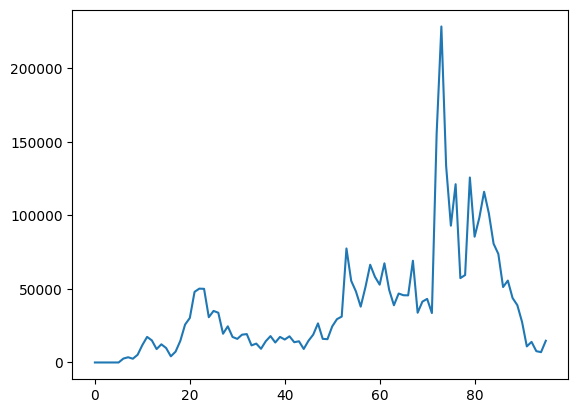

In [272]:

filter=commit_filtered_data['messageid'].str.contains("").fillna(False)
specific_data = commit_filtered_data[filter]
specific = filtered_data[filtered_data['list'] == project_id]
project_years = specific_data['commit_datetime'].apply(lambda x: int(x.year) + int(x.month)/12)
hist=np.histogram(list(project_years),bins=np.arange(2003, 2019,step=.166666))
print(hist[0])
# for i in range(0,250):
plt.plot(range(len(hist[0])),hist[0])
# plt.ylim((0,10))
plt.show()
# dataset.append(hist[0])

In [267]:
dataset=[]
column='messageid'
string=''
for project_id in unique_projects:
    project_data = commit_filtered_data[commit_filtered_data['list'] == project_id]
    filter=project_data[column].str.contains(string).fillna(False)
    specific_data = project_data[filter]
    # specific_data = specific_data[specific_data['list'] == project_id]
    project_years = specific_data['commit_datetime'].apply(lambda x: int(x.year) + int(x.month)/12)
    hist=np.histogram(list(project_years),bins=np.arange(2003, 2019,step=.166666))
    # print(hist)
    dataset.append(hist[0])

IndexError: list index out of range

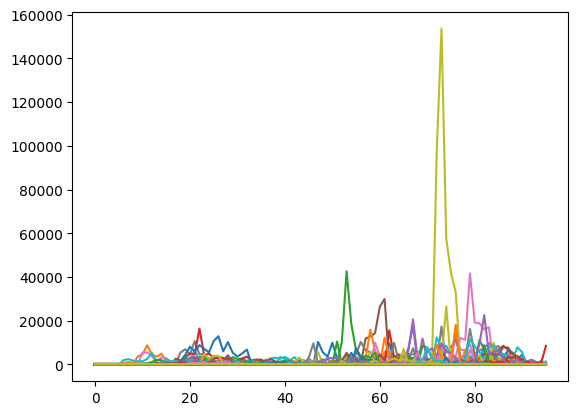

In [268]:
for i in range(0,300):
    plt.plot(range(len(dataset[i])),dataset[i])
plt.show()

In [210]:
len(dataset)

269

In [213]:
lists_df=pd.read_csv("../bigfiles/lists_2019_8.csv", usecols=["listid","listname","status", 'start_date','end_date'], header=0, encoding="ISO-8859-1")

In [225]:
import matplotlib.pyplot as plt

# Convert start_date and end_date to datetime
lists_df['start_date'] = pd.to_datetime(lists_df['start_date'], errors='coerce')
lists_df['end_date'] = pd.to_datetime(lists_df['end_date'], errors='coerce')

# Fill missing end_dates with the current date to represent ongoing projects
lists_df['end_date'].fillna(pd.to_datetime('now'), inplace=True)

# Calculate project lifespan in days
lists_df['lifespan_days'] = (lists_df['end_date'] - lists_df['start_date']).dt.days

# Filter out rows where dates could not be converted (invalid dates)
lists_df_filtered = lists_df.dropna(subset=['start_date', 'lifespan_days'])
lists_df_sorted=lists_df_filtered.sort_values(by='start_date')

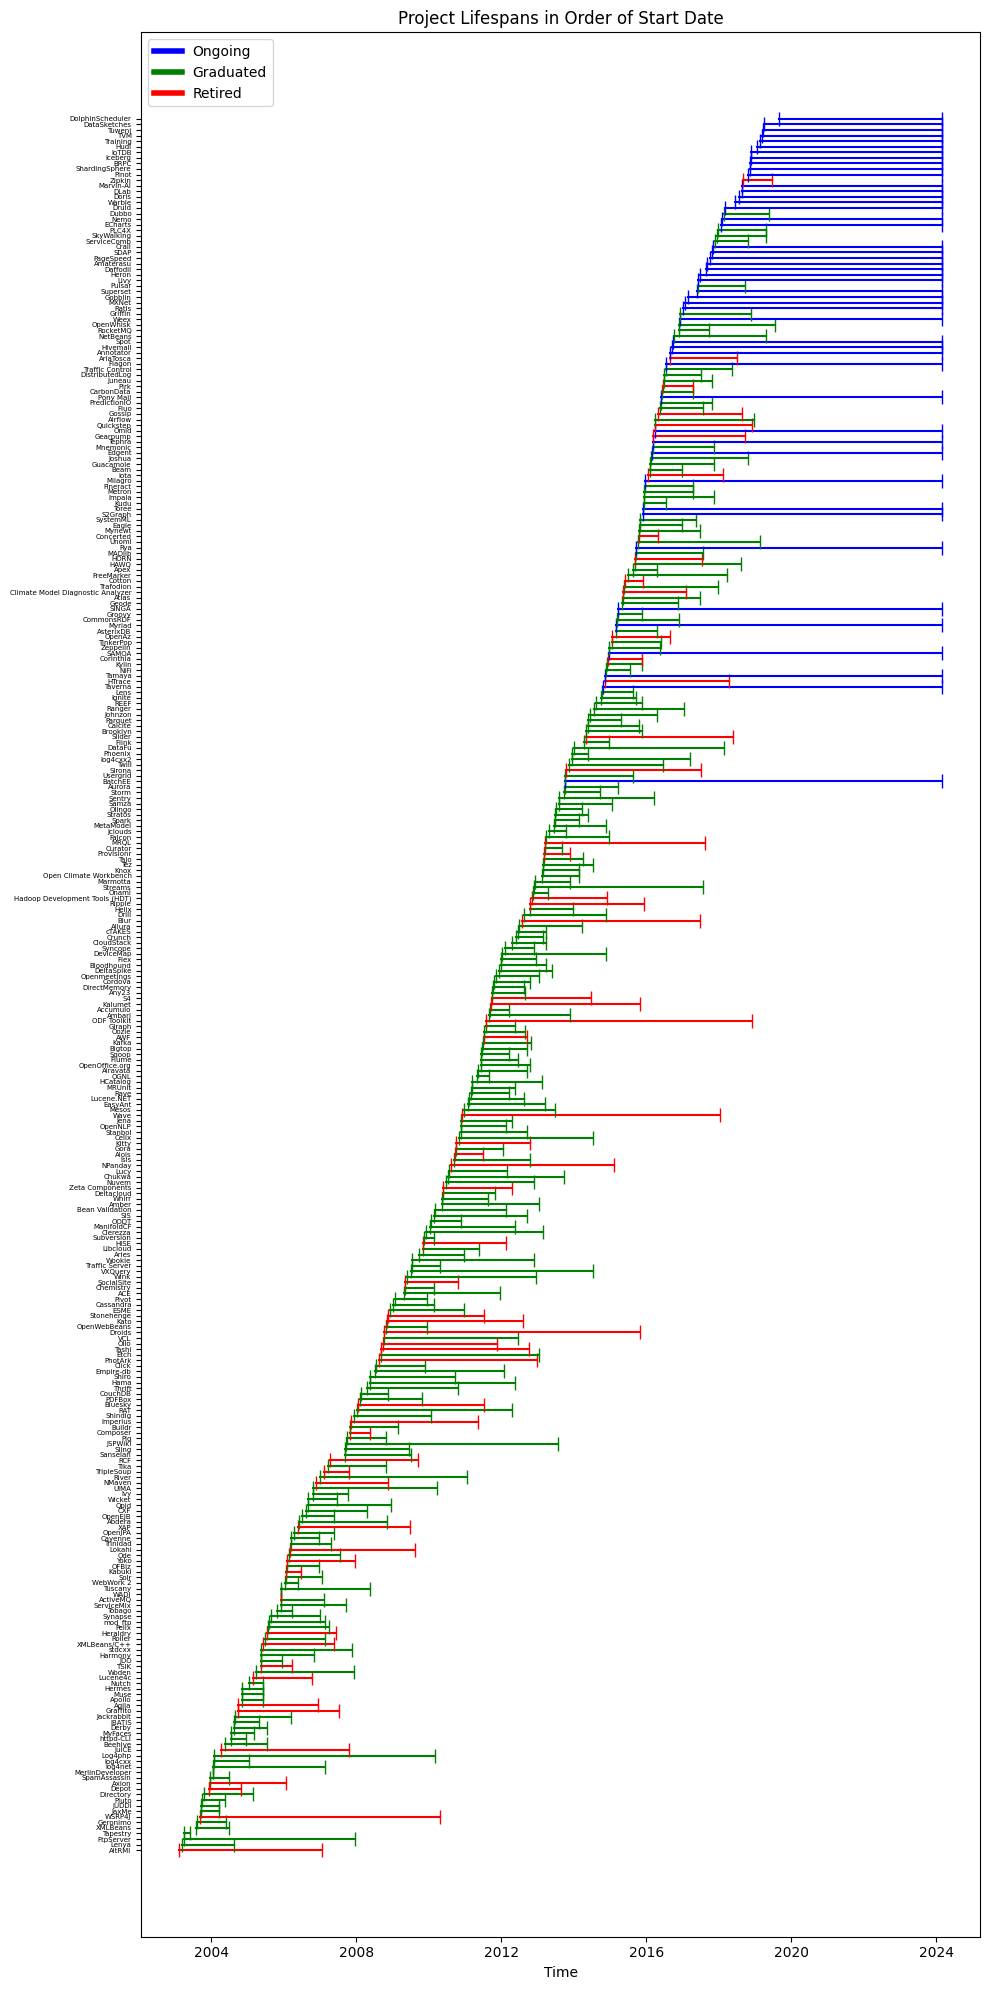

In [251]:
lists_df_sorted.reset_index(drop=True, inplace=True)

# Re-plotting with the corrected sorted order
fig, ax = plt.subplots(figsize=(10, 20))

# Define colors for each status
colors = {0: 'blue', 1: 'green', 2: 'red'}

# Plot each project with the color based on its status
for i, row in lists_df_sorted.iterrows():
    ax.plot([row['start_date'], row['end_date']], [i, i], marker='|', markersize=10, color=colors[row['status']])

ax.set_yticks(range(len(lists_df_sorted)))
ax.set_yticklabels(lists_df_sorted['listname'], fontsize=5)
ax.set_xlabel('Time')
ax.set_title('Project Lifespans in Order of Start Date')

# Create custom legends
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=colors[0], lw=4, label='Ongoing'),
                   Line2D([0], [0], color=colors[1], lw=4, label='Graduated'),
                   Line2D([0], [0], color=colors[2], lw=4, label='Retired')]
ax.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.show()